# Q1


In [1]:
# Step 1: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Download the data to your local environment
data_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
data_file = "u.user"
import urllib.request
urllib.request.urlretrieve(data_url, data_file)

# Step 3: Read the dataset using pandas
users = pd.read_csv(data_file, delimiter='|')

# Continue with the remaining steps...

# Step 4
mean_age_per_occupation = users.groupby('occupation')['age'].mean()

# Step 5
users['is_male'] = (users['gender'] == 'M').astype(int)
male_ratio_per_occupation = users.groupby('occupation')['is_male'].mean().sort_values(ascending=False)

# Step 6
min_age_per_occupation = users.groupby('occupation')['age'].min()
max_age_per_occupation = users.groupby('occupation')['age'].max()

# Step 7
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()

# Step 8
total_per_occupation = users.groupby('occupation')['gender'].count()
percentage_per_occupation = (users.groupby(['occupation', 'gender'])['gender'].count() / total_per_occupation * 100).round(2)

print("Mean age per occupation:\n", mean_age_per_occupation)
print("\nMale ratio per occupation (from most to least):\n", male_ratio_per_occupation)
print("\nMinimum age per occupation:\n", min_age_per_occupation)
print("\nMaximum age per occupation:\n", max_age_per_occupation)
print("\nMean age per occupation and sex:\n", mean_age_per_occupation_sex)
print("\nPercentage of women and men per occupation:\n", percentage_per_occupation)

Mean age per occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male ratio per occupation (from most to least):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.6938

# Q2

In [18]:
import pandas as pd

# Step 2. Import the dataset from the given address
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

# Step 4. Select only the Goal column
goals = euro12['Goals']

# Step 5. How many teams participated in Euro 2012?
num_teams = euro12['Team'].nunique()
print("Number of teams participated in Euro 2012:", num_teams)

# Step 6. What is the number of columns in the dataset?
num_columns = len(euro12.columns)
print("Number of columns in the dataset:", num_columns)

# Step 7. View only the columns Team, Yellow Cards, and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Step 8. Sort the teams by Red Cards, then by Yellow Cards
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)

# Step 9. Calculate the mean Yellow Cards given per Team
mean_yellow_cards = euro12['Yellow Cards'].mean()
print("Mean Yellow Cards per Team:", mean_yellow_cards)

# Step 10. Filter teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]

# Step 11. Select the teams that start with the letter "G"
teams_start_with_G = euro12[euro12['Team'].str.startswith('G')]

# Step 12. Select the first 7 columns
first_seven_columns = euro12.iloc[:, :7]

# Step 13. Select all columns except the last 3
all_except_last_three_columns = euro12.iloc[:, :-3]

# Step 14. Present only the Shooting Accuracy from England, Italy, and Russia
shooting_accuracy_3_teams = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]


Number of teams participated in Euro 2012: 16
Number of columns in the dataset: 35
Mean Yellow Cards per Team: 7.4375


# Q3

In [9]:
# Step 1
import pandas as pd
import numpy as np

# Step 2
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Step 3
df = pd.DataFrame({'bedrs': series1, 'bathrs': series2, 'price_sqr_meter': series3})

# Step 4
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5
bigcolumn = pd.concat([series1, series2, series3], axis=0, ignore_index=True)

# Step 6
print("Is it true that bigcolumn goes only until index 99?:", bigcolumn.index.max() == 99)

# Step 7
bigcolumn.index = range(300)

print("Reindexed DataFrame 'bigcolumn':\n", bigcolumn)


Is it true that bigcolumn goes only until index 99?: False
Reindexed DataFrame 'bigcolumn':
 0          3
1          4
2          1
3          1
4          3
       ...  
295    25686
296    16951
297    13955
298    26910
299    25265
Length: 300, dtype: int32


# Q4

In [10]:
# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2. Import the dataset from the attached file wind.txt
data = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0, 1, 2]])

# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data = data.set_index('Yr_Mo_Dy')

# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
def fix_year(year):
    if year > 2000:
        year -= 100
    return year

data.index = data.index.map(lambda x: pd.Timestamp(year=fix_year(x.year), month=x.month, day=x.day))

# Step 5. Set the right dates as the index. Pay attention to the data type, it should be datetime64[ns].
data.index = pd.to_datetime(data.index)

# Step 6. Compute how many values are missing for each location over the entire record.
missing_values_per_location = data.isnull().sum()

# Step 7. Compute how many non-missing values there are in total.
non_missing_values_total = data.notnull().sum().sum()

# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
mean_windspeed = data.mean().mean()

# Step 9. Create a DataFrame called loc_stats and calculate the min, max, and mean windspeeds and standard deviations of the windspeeds at each location over all the days.
loc_stats = data.agg(['min', 'max', 'mean', 'std'])

# Step 10. Create a DataFrame called day_stats and calculate the min, max, and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)

# Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
january_avg_windspeed = data[data.index.month == 1].mean()

# Step 12. Downsample the record to a yearly frequency for each location.
yearly_data = data.resample('Y').mean()

# Step 13. Downsample the record to a monthly frequency for each location.
monthly_data = data.resample('M').mean()

# Step 14. Downsample the record to a weekly frequency for each location.
weekly_data = data.resample('W').mean()

# Step 15. Calculate the min, max, and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2, 1961) for the first 52 weeks.
weekly_stats = weekly_data.iloc[1:53].agg(['min', 'max', 'mean', 'std'])
print("Step 6 - Missing values per location:")
print(missing_values_per_location)

print("\nStep 7 - Total non-missing values:")
print(non_missing_values_total)

print("\nStep 8 - Mean windspeed over all locations and times:")
print(mean_windspeed)

print("\nStep 9 - loc_stats:")
print(loc_stats)

print("\nStep 10 - day_stats:")
print(day_stats)

print("\nStep 11 - Average windspeed in January for each location:")
print(january_avg_windspeed)

print("\nStep 12 - Yearly data:")
print(yearly_data)

print("\nStep 13 - Monthly data:")
print(monthly_data)

print("\nStep 14 - Weekly data:")
print(weekly_data)

print("\nStep 15 - Weekly statistics for the first 52 weeks:")
print(weekly_stats)

Step 6 - Missing values per location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Step 7 - Total non-missing values:
78857

Step 8 - Mean windspeed over all locations and times:
10.227982360836938

Step 9 - loc_stats:
            RPT        VAL        ROS        KIL        SHA        BIR  \
min    0.670000   0.210000   1.500000   0.000000   0.130000   0.000000   
max   35.800000  33.370000  33.840000  28.460000  37.540000  26.160000   
mean  12.362987  10.644314  11.660526   6.306468  10.455834   7.092254   
std    5.618413   5.267356   5.008450   3.605811   4.936125   3.968683   

            DUB        CLA        MUL        CLO        BEL        MAL  
min    0.000000   0.000000   0.000000   0.040000   0.130000   0.670000  
max   30.370000  31.080000  25.880000  28.210000  42.380000  42.540000  
mean   9.797343   8.495053   8.493590   8.707332  13.121007  15.599079  
std    4.977555   4.499449   4.166872   4

# Q5

In [4]:
# Step 1
import pandas as pd

# Step 2
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

# Step 3 is already done by assigning the dataset to the variable 'chipo'

# Step 4
print("First 10 entries in the dataset:\n", chipo.head(10))

# Step 5
num_observations = chipo.shape[0]
print("\nNumber of observations in the dataset:", num_observations)

# Step 6
num_columns = chipo.shape[1]
print("\nNumber of columns in the dataset:", num_columns)

# Step 7
print("\nColumn names:\n", chipo.columns)

# Step 8
print("\nIndex of the dataset:\n", chipo.index)

# Step 9
most_ordered_item = chipo['item_name'].mode().iloc[0]
print("\nMost-ordered item:", most_ordered_item)

# Step 10
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("\nNumber of items ordered for the most-ordered item:", most_ordered_item_count)

# Step 11
most_ordered_choice_description = chipo['choice_description'].mode().iloc[0]
print("\nMost-ordered item in the choice_description column:", most_ordered_choice_description)

# Step 12
total_items_ordered = chipo['quantity'].sum()
print("\nTotal number of items ordered:", total_items_ordered)

# Step 13
# Convert item_price to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

# Check the item price type
print("\nType of item_price column after converting to float:", chipo['item_price'].dtype)

# Step 14
revenue = (chipo['item_price'] * chipo['quantity']).sum()
print("\nTotal revenue for the period:", revenue)

# Step 15
num_orders = chipo['order_id'].nunique()
print("\nNumber of orders made in the period:", num_orders)

# Step 16
average_revenue_per_order = revenue / num_orders
print("\nAverage revenue amount per order:", average_revenue_per_order)

# Step 17
num_different_items_sold = chipo['item_name'].nunique()
print("\nNumber of different items sold:", num_different_items_sold)


First 10 entries in the dataset:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39 

# Q6

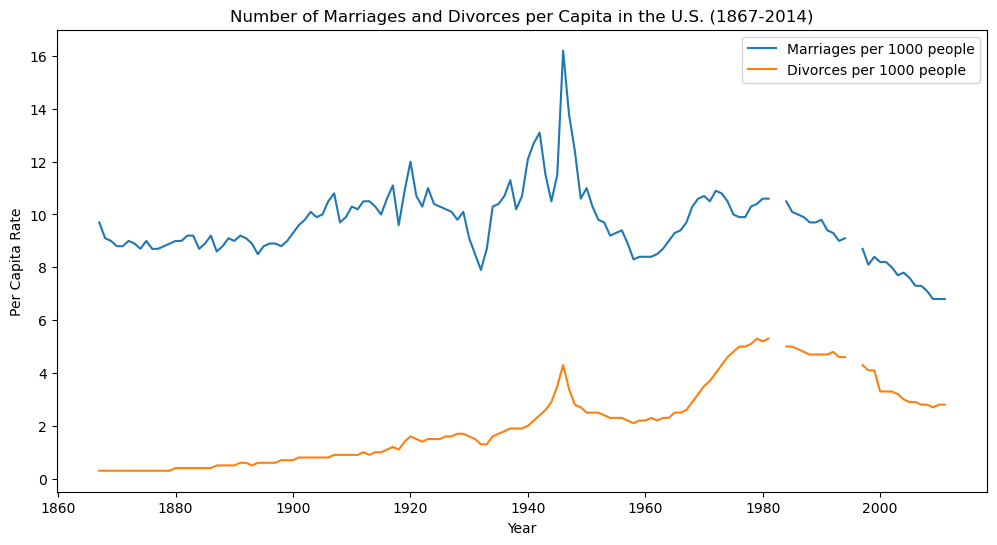

In [20]:
# Step 1: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Import the dataset from the provided source
url = "us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(url)

# Step 3: Create a line plot
plt.figure(figsize=(12, 6))

# Plotting the marriages per capita
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000 people')

# Plotting the divorces per capita
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000 people')

# Step 4: Label the axes
plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')

# Step 5: Show the legend
plt.legend()

# Step 6: Show the plot
plt.show()


# Q7

Index(['Year', 'Marriages', 'Divorces', 'Population', 'Marriages_per_1000',
       'Divorces_per_1000'],
      dtype='object')


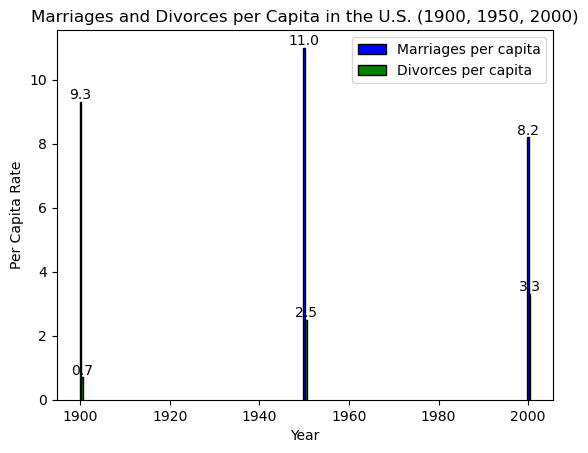

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv("us-marriages-divorces-1867-2014.csv")
print(data.columns)

# Filter data for the years 1900, 1950, and 2000
years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years)]

# Get the number of marriages and divorces per capita for each year
marriages_per_capita = filtered_data.set_index('Year').loc[years, 'Marriages_per_1000']
divorces_per_capita = filtered_data.set_index('Year').loc[years, 'Divorces_per_1000']

# Create the vertical bar chart
bar_width = 0.35
r1 = years
r2 = [x + bar_width for x in r1]

plt.bar(r1, marriages_per_capita, color='b', width=bar_width, edgecolor='black', label='Marriages per capita')
plt.bar(r2, divorces_per_capita, color='g', width=bar_width, edgecolor='black', label='Divorces per capita')

# Label the axes and add a title
plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')

# Add labels for each bar
for i in range(len(years)):
    plt.text(r1[i], marriages_per_capita.iloc[i], str(marriages_per_capita.iloc[i]), ha='center', va='bottom')
    plt.text(r2[i], divorces_per_capita.iloc[i], str(divorces_per_capita.iloc[i]), ha='center', va='bottom')

# Add a legend
plt.legend()

# Show the chart
plt.show()


# Q8

Index(['Actor', 'Count'], dtype='object')


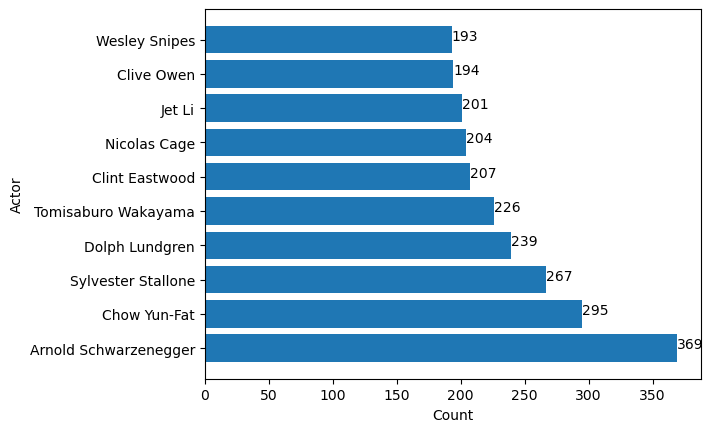

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv("actor_kill_counts.csv")
print(data.columns)

# Sort the data by kill count in descending order
sorted_data = data.sort_values(by='Count', ascending=False)

# Get the actor names and kill counts for the chart
actors = sorted_data['Actor'].tolist()
kill_counts = sorted_data['Count'].tolist()

# Create the horizontal bar chart
plt.barh(actors, kill_counts)

# Label the axes
plt.xlabel('Count')
plt.ylabel('Actor')

# Add labels for each bar
for index, value in enumerate(kill_counts):
    plt.text(value, index, str(value))

# Show the chart
plt.show()


# Q9

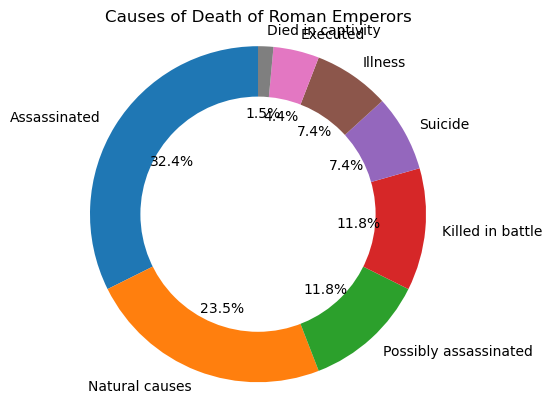

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv("roman-emperor-reigns.csv")

# Count the number of different categories or causes of death
death_categories = data['Cause_of_Death'].value_counts()

# Labels for the pie chart
labels = death_categories.index.tolist()

# Data for the pie chart
sizes = death_categories.tolist()

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle to make the pie chart circular
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))

# Add a title
plt.title('Causes of Death of Roman Emperors')

# Equal aspect ratio ensures the pie chart is a circle.
plt.axis('equal')

# Show the pie chart
plt.show()



# Q10

Index(['Year', 'Total Arcade Revenue (billions)',
       'Computer Science Doctorates Awarded (US)'],
      dtype='object')


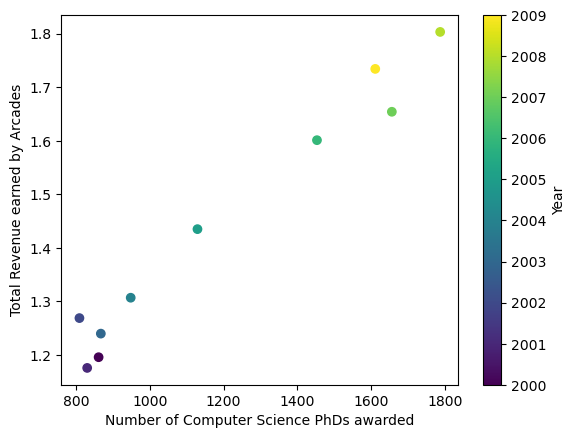

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
print(data.columns)
# Create the scatter plot
plt.scatter(data["Computer Science Doctorates Awarded (US)"], data["Total Arcade Revenue (billions)"], c=data["Year"], cmap='viridis')

# Label the axes and add a colorbar
plt.xlabel("Number of Computer Science PhDs awarded")
plt.ylabel("Total Revenue earned by Arcades")
plt.colorbar(label='Year')

# Show the plot
plt.show()


